In [2]:
!wget https://raw.githubusercontent.com/NeuralFalconYT/facenet-pytorch-embedding/refs/heads/main/crop_face.jpg
!pip install facenet-pytorch==2.6.0
from IPython.display import clear_output
clear_output()

  0%|          | 0.00/107M [00:00<?, ?B/s]

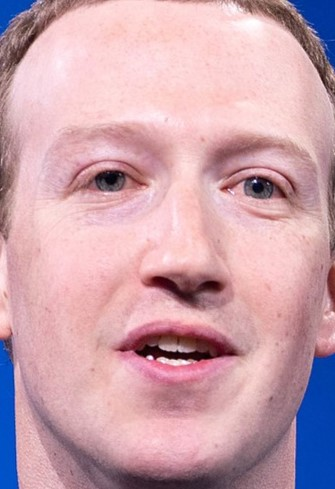

[ 3.92952841e-03  2.37750355e-02  2.79730628e-03 -1.54715553e-02
  6.00490235e-02 -1.95792951e-02 -4.27765101e-02  6.12433031e-02
  4.80823219e-02 -1.02264443e-02 -8.03889036e-02  6.96163950e-03
  3.50307412e-02  1.11736037e-01 -4.35871743e-02 -4.31445092e-02
 -2.43070070e-02  6.27962127e-02  8.02468322e-03 -6.38303012e-02
 -3.67691740e-02  1.75991282e-02  6.03951253e-02  1.94911454e-02
  3.41965444e-02 -2.87057296e-03  2.20815185e-02  3.07610002e-03
  8.13870952e-02 -4.41889092e-03  2.56441403e-02 -7.21172243e-02
  9.39554498e-02 -5.40075079e-02  9.37480554e-02  1.66057777e-02
 -4.60794941e-02  4.32143956e-02 -3.65228578e-02 -1.92430001e-02
 -5.59103899e-02 -3.60693634e-02  3.45085487e-02 -2.03940701e-02
 -3.15167531e-02  1.71878096e-02 -9.99150127e-02  1.45431263e-02
 -8.09104368e-02 -1.15988376e-02 -6.11818861e-03 -2.62013059e-02
 -4.32570316e-02 -2.39791702e-02 -7.44409487e-02  1.84635986e-02
  4.45943139e-03 -1.53646506e-02  3.85322534e-02 -4.93409894e-02
 -2.96744406e-02 -3.04243

In [1]:
import torch
import cv2
from PIL import Image
from torchvision import transforms
from facenet_pytorch import InceptionResnetV1
from google.colab.patches import cv2_imshow
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
face_model = InceptionResnetV1(pretrained='vggface2').eval().to(device)

def get_embedding(face):
    global face_model,device
    img = Image.fromarray(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
    preprocess = transforms.Compose([
        transforms.Resize((160, 160)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ])
    img_tensor = preprocess(img).unsqueeze(0).to(device)
    with torch.no_grad():
        embedding = face_model(img_tensor)  # Directly use the global face_model
    return embedding.squeeze().cpu().numpy()

face_crop_image=cv2.imread("/content/crop_face.jpg")
embedding=get_embedding(face_crop_image)
cv2_imshow(face_crop_image)
print(embedding)